In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
# !wget https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.tgz
# !tar zxvf housing.tgz
# !mkdir -p datasets
# !mv housing.csv datasets
# !rm housing.tgz

In [3]:
!tree

.
├── Apartments.ipynb
├── datasets
│   └── housing.csv
└── models
    ├── forest_reg1565677574.7561936
    ├── lin_reg1565677574.865018
    └── tree_reg1565677574.8628771

2 directories, 5 files


In [4]:
import pandas as pd

In [5]:
csv_path = os.path.join(os.getcwd(), 'datasets/housing.csv')

In [6]:
housing_data = pd.read_csv(csv_path)

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


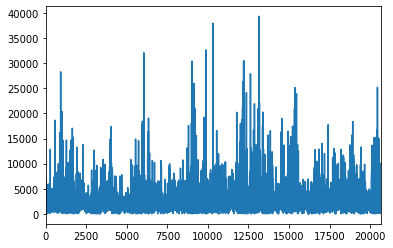

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data['total_rooms'].plot()

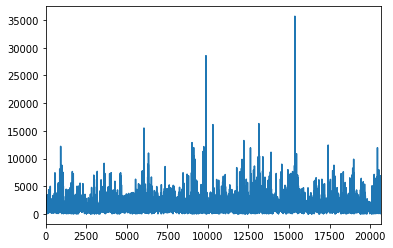

In [11]:
housing_data['population'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f413187f940>,
      dtype=object)

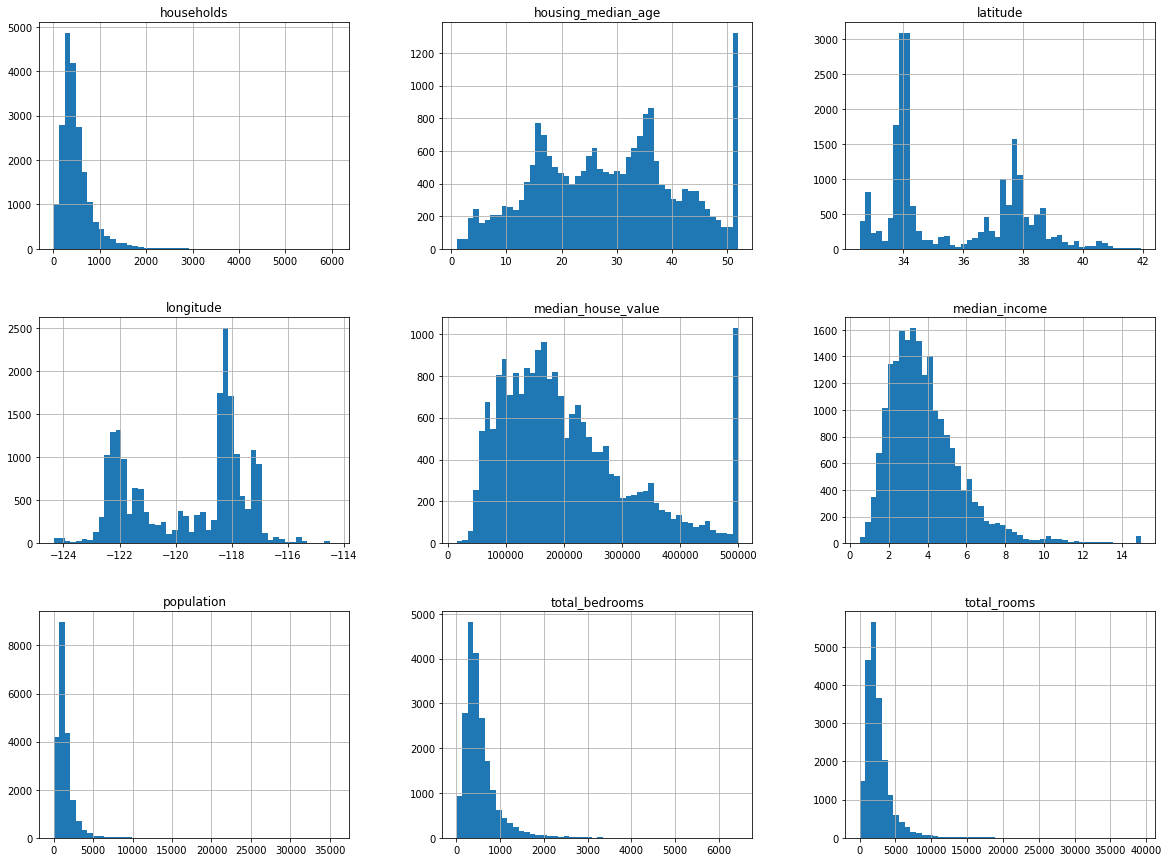

In [12]:
housing_data.hist(bins=50, figsize=(20,15))

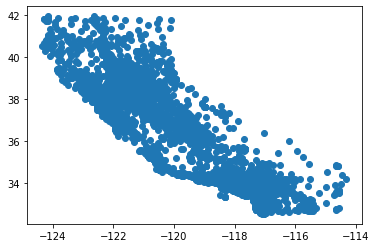

In [13]:
plt.plot(housing_data['longitude'], housing_data['latitude'], 'o')
plt.show()

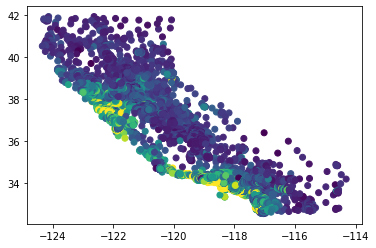

In [14]:
import numpy as np
from sklearn import preprocessing

house_val = housing_data["median_house_value"].to_numpy()
house_val=house_val.reshape((1, -1))
house_val= preprocessing.normalize(house_val)
house_val=house_val[0]

plt.scatter(housing_data['longitude'], housing_data['latitude'], c=house_val)
plt.show()

In [15]:
def split_test_train(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_test_train(housing_data, 0.2)
print("Uczących: {}, testowych: {}".format(len(train_set), len(test_set)))

Uczących: 16512, testowych: 4128


In [17]:
import hashlib

def test_set_check(id, test_ratio, hash):
    return hash(np.int64(id)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_data["id"] = housing_data["longitude"] * 1000 + housing_data["latitude"]
train_set, test_set = split_train_test_by_id(housing_data, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size = 0.2, random_state = 42)

In [20]:
housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace = True)

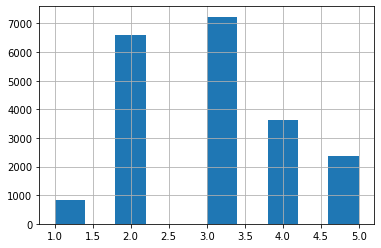

In [21]:
housing_data["income_cat"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    start_train_set = housing_data.loc[train_index]
    start_test_set = housing_data.loc[test_index]


In [23]:
housing_data['income_cat'].value_counts() / len(housing_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

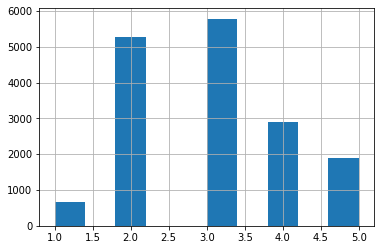

In [24]:
start_train_set["income_cat"].hist()

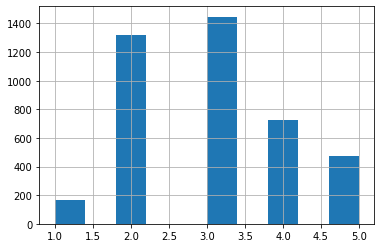

In [25]:
start_test_set["income_cat"].hist()

In [26]:
for set_ in (start_train_set, start_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

In [27]:
housing = start_train_set.copy()

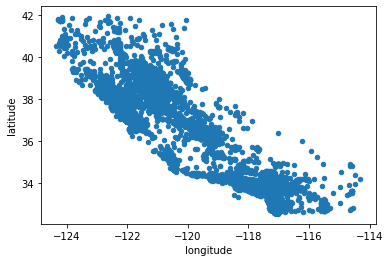

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude")

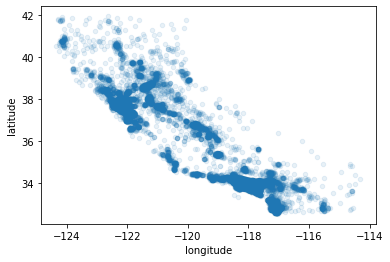

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

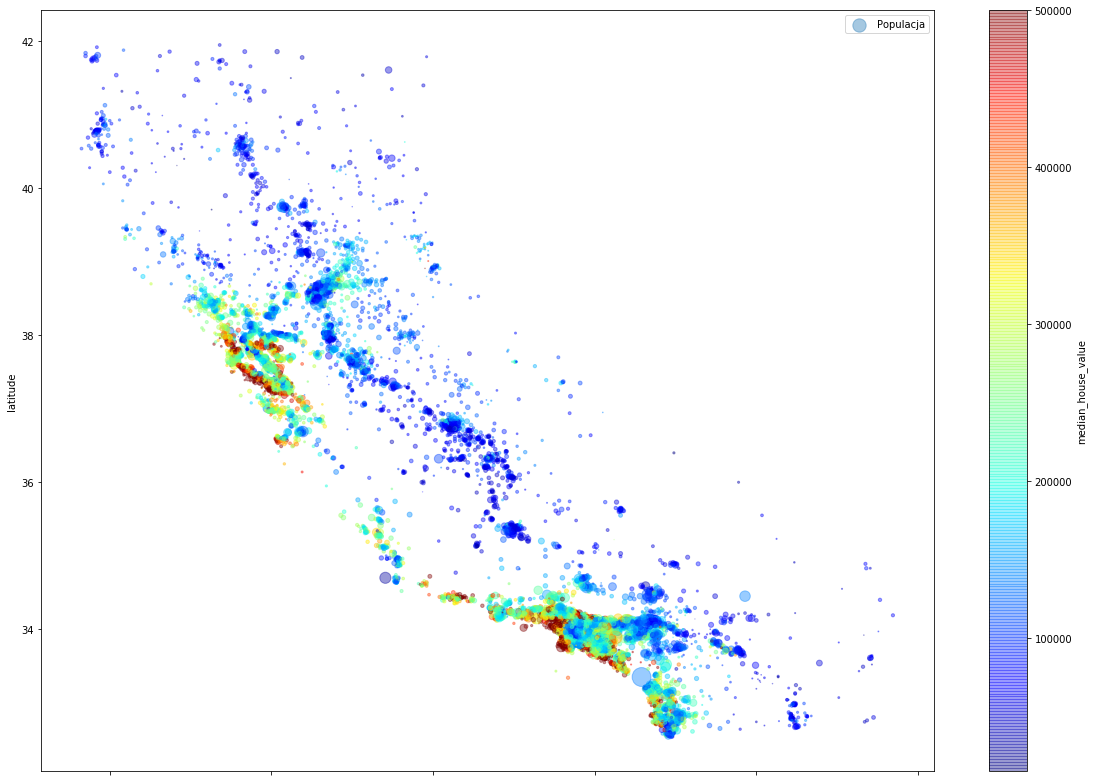

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="Populacja", figsize=(20,14), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [31]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
id                   -0.047632
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4124abc4a8>,
      dtype=object)

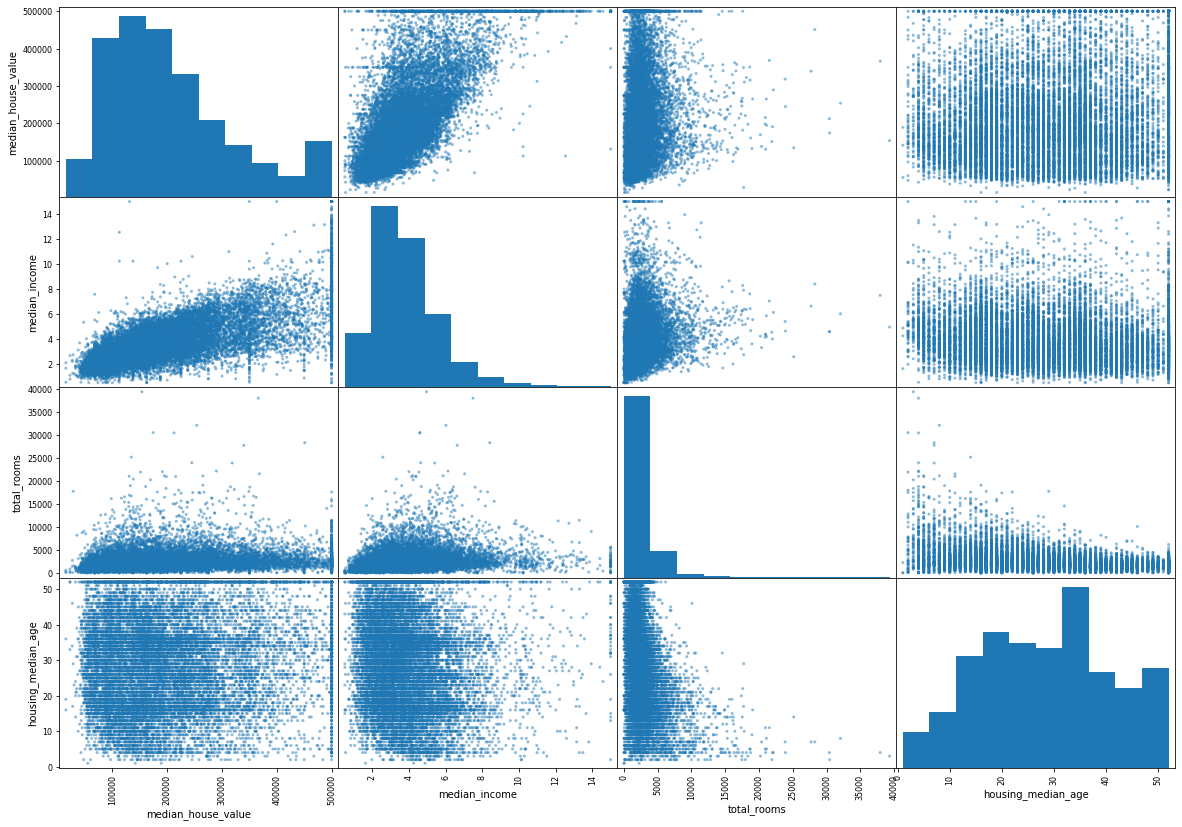

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20,14))

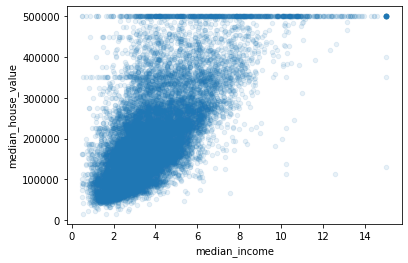

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [34]:
housing["rooms_over_family"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_over_rooms"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_over_family"] = housing["population"]/housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.687160
rooms_over_family         0.146285
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
population_over_family   -0.021985
population               -0.026920
longitude                -0.047432
id                       -0.047632
latitude                 -0.142724
bedrooms_over_rooms      -0.259984
Name: median_house_value, dtype: float64

ML algorithm

In [36]:
housing = start_train_set.drop("median_house_value", axis=1)
housing_labels = start_train_set["median_house_value"].copy()

In [37]:
from sklearn.impute import SimpleImputer
    
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis =1 )

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
       -1.18475925e+05])

In [39]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
       -1.18475925e+05])

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [43]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [45]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot.shape

(16512, 5)

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_family = X[:, rooms_ix]/X[:,household_ix]
        population_per_family = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_family, population_per_family, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_family, population_per_family]

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
[
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [49]:
# Definicja klasy CategoricalEncoder, skopiowana z prośby PR #9151.
# Uruchom tę komórkę nie próbując rozumieć jej zawartości (na razie).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Koduje cechy kategorialne w postaci macierzy numerycznej.
    Danymi wejściowymi dostarczanymi do tego transformatora powinna być macierz
    zawierająca liczby stałoprzecinkowe lub ciągi znaków, symbolizujące
    wartości przechowywane przez cechy kategorialne (dyskretne).
    Możemy kodować cechy za pomocą schematu "gorącojedynkowego" (jeden-z-K)
    (``encoding='onehot'``, domyślne rozwiązanie) lub przekształcać je do postaci
    liczb porządkowych (``encoding='ordinal'``).
    Tego typu kodowanie jest wymagane podczas dostarczania danych kategorialnych do wielu
    etymatorów modułu Scikit-Learn, mianowicie w modelach liniowych i maszynach
    SVM wykorzystujących standardowe jądra. Więcej informacji znajdziesz w:
    :ref:`User Guide <preprocessing_categorical_features>`.
    Parametry
    ----------
    encoding : ciąg znaków, 'onehot', 'onehot-dense' lub 'ordinal'
        Rodzaj stosowanego kodowania (domyślna wartość to 'onehot'):
        - 'onehot': koduje cechy za pomocą schematu "gorącojedynkowego" (jeden-z-K,
           bywa również nazywany kodowaniem 'sztucznym'). Zostaje utworzona kolumna
           binarna dla każdej kategorii, a zwracana jest macierz rzadka.
        - 'onehot-dense': to samo, co wartość 'onehot', ale zwraca macierz gęstą zamiast rzadkiej.
        - 'ordinal': koduje cechy w postaci liczb porządkowych. Uzyskujemy w ten sposób 
          pojedynczą kolumną zawierającą liczby stałoprzecinkowe (od 0 do n_kategorii - 1) 
          dla każdej cechy.
    categories : 'auto' lub lista list/tablic wartości.
        Kategorie (niepowtarzalne wartości) na każdą cechę:
        - 'auto' : Automatycznie określa kategorie za pomocą danych uczących. 
        - lista : ``categories[i]`` przechowuje kategorie oczekiwane w i-tej kolumnie.
          Przekazane kategorie zostają posortowanie przed zakodowaniem danych
          (użyte kategorie można przejrzeć w atrybucie ``categories_``).
    dtype : typ liczby, domyślnie np.float64
        Wymagany typ wartości wyjściowej.
    handle_unknown : 'error' (domyślnie) lub 'ignore'
        Za jego pomocą określamy, czy w przypadku obecności nieznanej cechy w czasie
        wykonywania transformacji ma być wyświetlany komunikat o błędzie (wartość
        domyślna) lub czy ma zostać zignorowana. Po wybraniu wartości 'ignore' 
        i natrafieniu na nieznaną kategorię w trakcie przekształceń, wygenerowane
        kolumny "gorącojedynkowe" dla tej cechy będą wypełnione zerami. 
        Ignorowanie nieznanych kategorii nie jest obsługiwane w parametrze
        ``encoding='ordinal'``.
    Atrybuty
    ----------
    categories_ : lista tablic
        Kategorie każdej cechy określone podczas uczenia. W przypadku ręcznego 
        wyznaczania kategorii znajdziemy tu listę posortowanych kategorii
        (w kolejności odpowiadającej wynikowi operacji 'transform').
    Przykłady
    --------
    Mając zbiór danych składający się z trzech cech i dwóch próbek pozwalamy koderowi
    znaleźć maksymalną wartość każdej cechy i przekształcić dane do postaci
    binarnego kodowania "gorącojedynkowego".
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    Powiązane materiały
    --------
    sklearn.preprocessing.OneHotEncoder : przeprowadzana kodowanie "gorącojedynkowe"
      stałoprzecinkowych cech porządkowych. Klasa ``OneHotEncoder zakłada``, że cechy wejściowe
      przechowują wartości w zakresie ``[0, max(cecha)]`` zamiast korzystać z
      niepowtarzalnych wartości.
    sklearn.feature_extraction.DictVectorizer : przeprowadzana kodowanie "gorącojedynkowe"
      elementów słowanika (a także cech przechowujących ciągi znaków).
    sklearn.feature_extraction.FeatureHasher : przeprowadzana przybliżone kodowanie "gorącojedynkowe"
      elementów słownika lub ciągów znaków.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Dopasowuje klasę CategoricalEncoder do danych wejściowych X.
        Parametry
        ----------
        X : tablicopodobny, postać [n_próbek, n_cech]
            Dane służące do określania kategorii każdej cechy.
        Zwraca
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("Należy wybrać jedno z następujących kodowań: 'onehot', 'onehot-dense' "
                        "lub 'ordinal', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("Należy wybrać jedną z następujących wartości parametru handle_unknown: 'error' lub "
                        "'ignore', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("Wartość handle_unknown='ignore' nie jest obsługiwana przez parametr"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                               " podczas dopasowywania".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Przekształca X za pomocą kodowania "gorącojedynkowego".
        Parametry
        ----------
        X : tablicopodobny, postać [n_próbek, n_cech]
            Kodowane dane.
        Zwraca
        -------
        X_out : macierz rzadka lub dwuwymiarowa tablica
            Przekształcone dane wejściowe.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                           " podczas przekształcania".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Wyznaczamy akceptowalną wartość rzędom sprawiającym problem i
                    # kontynuujemy. Rzędy te zostają oznaczone jako `X_mask` i zostaną
                    # później usunięte.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [50]:
# from sklearn.preprocessing import CategoricalEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [51]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [52]:
housing_prepared = full_pipeline.fit_transform(housing)

In [53]:
housing_prepared.shape

(16512, 17)

# Dobór i uczenie modelu

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [56]:
print("Prognozy:", lin_reg.predict(some_data_prepared))
print("Etykiety:", list(some_labels))

Prognozy: [209887.   318823.   211806.75  58907.   189682.5 ]
Etykiety: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [57]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error (housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68624.58603935588


In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error (housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.0


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

Wyniki: [70312.36416015 66621.5721398  69723.66685424 69341.80655856
 72407.07439509 74704.05464023 69790.34870971 68071.65379357
 76285.41228332 69445.57863832]
Średnia: 70670.35321730006
Odchylenie standardowe: 2811.1490711851293


In [62]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Wyniki: [66794.56541733 66974.48878328 70344.25563896 74725.97624399
 68028.80400022 71197.60830539 64956.54650582 68276.25736928
 71539.9715512  67676.86798471]
Średnia: 69051.5341800177
Odchylenie standardowe: 2727.307539310845


In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error (housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18608.148367487473


In [65]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wyniki: [49451.09919008 47273.6854609  49316.44699895 51915.98972529
 49371.55651508 53199.83334894 48556.74430209 47805.40984782
 52717.36512517 49991.67113282]
Średnia: 49959.98016471304
Odchylenie standardowe: 1917.6433124953044


In [66]:
# import joblib
# import time

# !mkdir models

# joblib.dump(forest_reg, "models/forest_reg{}".format(time.time()))
# joblib.dump(tree_reg, "models/tree_reg{}".format(time.time()))
# joblib.dump(lin_reg, "models/lin_reg{}".format(time.time()))

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
             

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Analiza modeli

In [75]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [80]:
extra_attribs = ['rooms per family', 'family per population', 'bedrooms per rooms']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [81]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37071493304673864, 'median_income'),
 (0.12328934956936481, 'INLAND'),
 (0.10092492903966682, 'family per population'),
 (0.06816705359341196, 'id'),
 (0.06716319016274504, 'latitude'),
 (0.05578730553697756, 'bedrooms per rooms'),
 (0.0469811259491396, 'rooms per family'),
 (0.04504228608457222, 'longitude'),
 (0.038418361725445355, 'housing_median_age'),
 (0.015726127279266942, 'total_rooms'),
 (0.015212220707311954, 'total_bedrooms'),
 (0.01483007820520123, 'population'),
 (0.01467246311890578, '<1H OCEAN'),
 (0.014435002780311589, 'households'),
 (0.004897388651931342, 'NEAR OCEAN'),
 (0.003625403374826824, 'NEAR BAY'),
 (0.0001127811741823931, 'ISLAND')]

# Ocena

In [82]:
final_model = grid_search.best_estimator_

In [83]:
X_test = start_test_set.drop('median_house_value', axis=1)
y_test = start_test_set['median_house_value'].copy()

In [84]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [89]:
final_rmse

46416.236282606216

# Ćwiczenia

### 1. SVR

In [119]:
from sklearn.svm import SVR

svr = SVR(kernel="sigmoid", C=2.0, gamma="scale")

svr.fit(housing_prepared, housing_labels)

housing_predictions = svr.predict(housing_prepared)

svr_mse = mean_squared_error(housing_labels, housing_predictions)

svr_rmse = np.sqrt(svr_mse)

In [120]:
print(svr_rmse)

117798.1759638525


### 2. RandomizedSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

In [124]:
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [125]:
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None, verbose=0,
   

In [126]:
random_search.best_params_

{'n_estimators': 10, 'max_features': 4, 'bootstrap': False}

In [128]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# T.B.C